<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_27_hypothesis_testing_cars_cylinder_origin_chi_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chi-Square Test for Independence**

#### **Purpose**:
The Chi-Square Test for Independence is used to determine whether two categorical variables are independent or significantly associated. It compares the observed frequencies in a contingency table with the expected frequencies under the assumption of independence.

#### **Hypotheses**:
- **Null Hypothesis (H₀):** The two variables are independent (no association).
- **Alternative Hypothesis (H₁):** The two variables are not independent (significant association exists).

#### **Key Steps**:
1. **Create a Contingency Table**:
   - Summarize the observed frequencies of the two categorical variables.
2. **Compute Expected Frequencies**:
   - These represent the counts expected if the variables were truly independent.
3. **Calculate the Chi-Square Statistic**:
   - Measures the discrepancy between observed and expected frequencies.
4. **Evaluate the P-Value**:
   - A small p-value (\(p < 0.05\)) indicates a significant association between the variables.

#### **Outputs**:
- **Chi-Square Statistic**: Quantifies the difference between observed and expected frequencies.
- **P-Value**: Determines statistical significance.
- **Degrees of Freedom (DOF)**: Based on the dimensions of the contingency table.
- **Expected Frequencies**: Hypothetical counts if the variables were independent.

#### **Decision**:
- If \(p < 0.05\), reject the null hypothesis and conclude the variables are associated.
- If \(p \geq 0.05\), fail to reject the null hypothesis and conclude the variables are independent.


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cars = sns.load_dataset('mpg')

# Print the number of unique values for each column
unique_counts = cars.nunique()

# Define a threshold for unique values to classify as categorical
threshold = 10

# Identify columns to convert to categorical
categorical_cols = unique_counts[unique_counts < threshold].index.tolist()

# Convert suitable columns to category
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

# Verify the changes
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB
None



### **Chi-Square Test for Independence**

---

### **Explanation**:
1. **Contingency Table**:
   - The table summarizes the frequency distribution of `cylinders` (rows) across `origin` (columns).

2. **Chi-Square Test**:
   - Tests whether the observed distribution of `cylinders` and `origin` differs significantly from the expected distribution (if they were independent).

3. **Results**:
   - **Chi-Square Statistic**: Measures the deviation between observed and expected frequencies.
   - **P-Value**: Indicates whether the association is statistically significant.
   - **Degrees of Freedom (DOF)**: Based on the dimensions of the contingency table.
   - **Expected Frequencies**: Hypothetical frequencies if `cylinders` and `origin` were independent.

4. **Decision**:
   - If the p-value < 0.05, reject the null hypothesis and conclude that `cylinders` and `origin` are significantly associated.
   - Otherwise, fail to reject the null hypothesis.



In [46]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(cars['cylinders'], cars['origin'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the Chi-Square test results
print("Chi-Square Test Results")
print("-----------------------")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected,
                                               index=contingency_table.index,
                                               columns=contingency_table.columns))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the Null Hypothesis: There is a significant association between cylinders and origin.")
else:
    print("\nFail to Reject the Null Hypothesis: No significant association between cylinders and origin.")


Chi-Square Test Results
-----------------------
Chi-Square Statistic: 180.10
P-Value: 0.0000
Degrees of Freedom: 8

Expected Frequencies:
 origin        europe      japan         usa
cylinders                                  
3           0.703518   0.793970    2.502513
4          35.879397  40.492462  127.628141
5           0.527638   0.595477    1.876884
6          14.773869  16.673367   52.552764
8          18.115578  20.444724   64.439698

Reject the Null Hypothesis: There is a significant association between cylinders and origin.


### **Interpretation of the Chi-Square Test Results**

#### **Key Outputs**:
1. **Chi-Square Test Statistic**:  
   - Value: **180.10**  
     - This large value indicates a substantial difference between the observed and expected frequencies in the contingency table, suggesting a strong association.

2. **P-Value**:  
   - Value: **9.80e-35**  
     - The p-value is extremely small, far below the standard significance level (\( alpha = 0.05 \)).  
     - This indicates that the observed association is highly statistically significant.

3. **Degrees of Freedom (DOF)**:  
   - Value: **8**  

4. **Expected Frequencies**:  
   - These represent the hypothetical counts for each combination of `cylinders` and `origin` if the variables were independent (i.e., no association).  
   - Comparing the expected frequencies with the observed frequencies shows where the largest discrepancies occur.

---

#### **Decision**:
- Since the p-value is significantly smaller than \( alpha = 0.05 \), we **reject the null hypothesis**.
- Conclusion: There is a **significant association** between `cylinders` and `origin`. The number of cylinders in a car is **not independent** of its origin (USA, Europe, or Japan).

---

#### **Implications**:
- The association suggests that certain cylinder configurations are more common in cars from specific origins:
  - **USA**: Likely to have cars with higher cylinder counts (e.g., 6 or 8 cylinders).
  - **Europe** and **Japan**: Likely to have cars with lower cylinder counts (e.g., 4 cylinders).

---

1. **Clustered Bar Chart** to visualize the relationship between `cylinders` and `origin`
2. **Normalized Data**:
   - The contingency table is normalized to show percentages instead of raw counts, making comparisons easier across origins with different total counts.

3. **Clustered Bars**:
   - Each `origin` category is represented by a cluster of bars, one for each cylinder group.



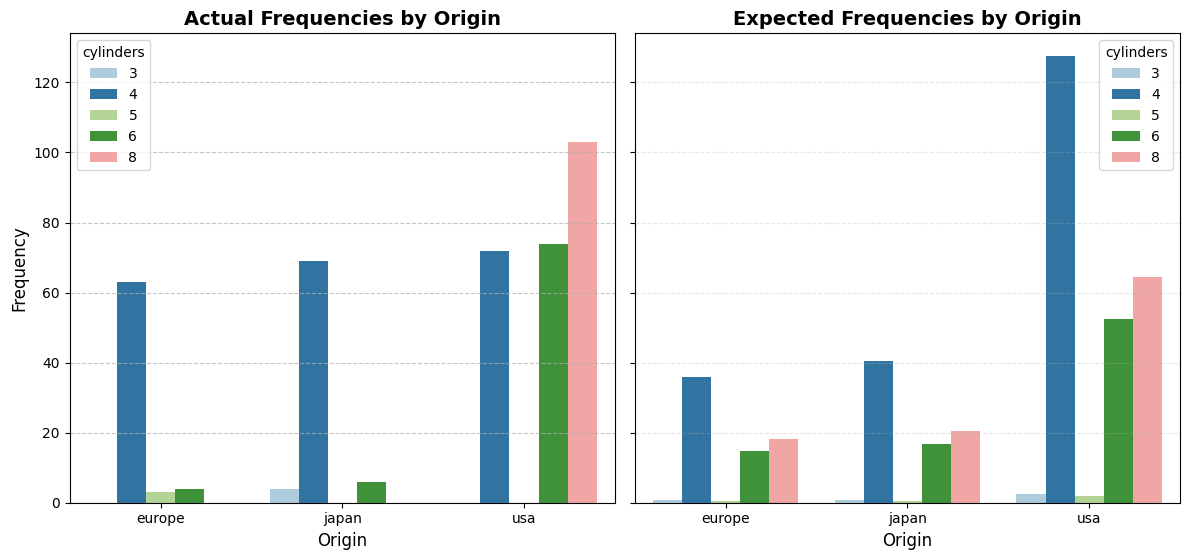

In [47]:
# Create a contingency table for actual frequencies
contingency_table = pd.crosstab(cars['cylinders'], cars['origin'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Convert expected frequencies to a DataFrame
expected_frequencies = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Melt actual and expected frequencies for plotting
actual_melted = contingency_table.reset_index().melt(id_vars='cylinders', var_name='origin', value_name='actual')
expected_melted = expected_frequencies.reset_index().melt(id_vars='cylinders', var_name='origin', value_name='expected')

# Define a color palette
palette = sns.color_palette("Paired", n_colors=contingency_table.shape[0])

# Set up the figure for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot actual frequencies
sns.barplot(
    data=actual_melted, x='origin', y='actual', hue='cylinders', palette=palette, ax=axes[0]
)
axes[0].set_title('Actual Frequencies by Origin', fontsize=14, weight='bold')
axes[0].set_xlabel('Origin', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot expected frequencies
sns.barplot(
    data=expected_melted, x='origin', y='expected', hue='cylinders', palette=palette, ax=axes[1]
)
axes[1].set_title('Expected Frequencies by Origin', fontsize=14, weight='bold')
axes[1].set_xlabel('Origin', fontsize=12)
axes[1].set_ylabel('')  # No ylabel for consistency
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# # Add a shared legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title='Cylinders', loc='upper center', ncol=len(contingency_table.index), fontsize=10)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the shared legend
plt.show()


### **Standardized Residuals Heatmap**

#### **Purpose**:
The standardized residuals heatmap is used to identify which combinations of `cylinders` and `origin` contribute most to the observed association between these variables, as detected by the Chi-Square test.

#### **How Residuals Are Calculated**:
Residuals measure the difference between the **observed** and **expected** frequencies, standardized to account for the scale of the expected values.

#### **Key Points**:
- **Positive Residuals**: Observed frequencies are higher than expected (indicating an overrepresentation of that group).
- **Negative Residuals**: Observed frequencies are lower than expected (indicating an underrepresentation of that group).

#### **What the Plot Shows**:
- The heatmap highlights standardized residuals for each `cylinders` and `origin` combination.
- Cells with large deviations (positive or negative) are emphasized using a gradient color scale:
  - **Grenn/Yellow Shades**: Indicate where the strongest differences between observed and expected counts occur.
  - **Near Zero Values**: Suggest observed counts closely match expected counts.

#### **Insights**:
- The heatmap helps pinpoint specific relationships that drive the association between `cylinders` and `origin`.
- Larger residuals (both positive and negative) are of particular interest and warrant further exploration.




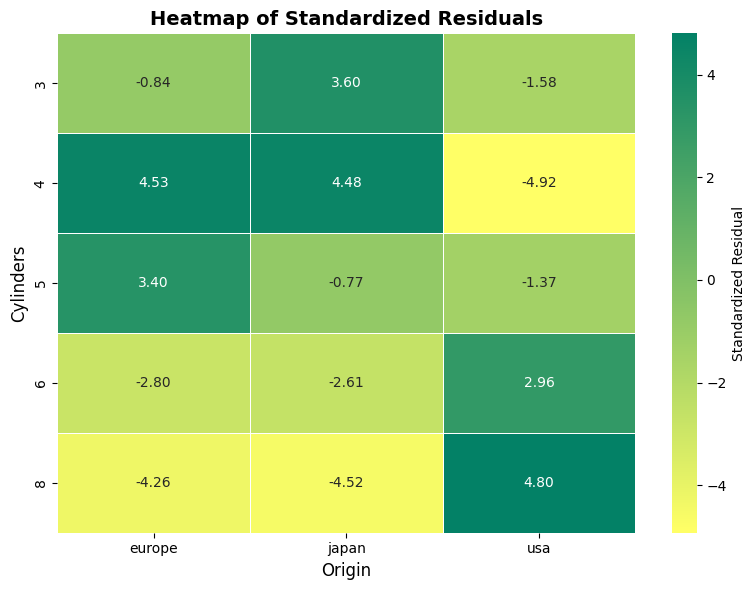

In [42]:
# Calculate standardized residuals
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns)
# print("Standardized Residuals:\n", residuals_df)

# Plot the heatmap of standardized residuals
plt.figure(figsize=(8, 6))
sns.heatmap(
    residuals_df, annot=True, cmap="summer_r", center=0, fmt=".2f",
    linewidths=0.5, cbar_kws={"label": "Standardized Residual"}
)
plt.title('Heatmap of Standardized Residuals', fontsize=14, weight='bold')
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Cylinders', fontsize=12)
plt.tight_layout()
plt.show()




### **Key Points for Interpretation**:
1. **Magnitude of Residuals**:
   - Residuals with larger absolute values (typically greater than \(2\) or \(3\)) indicate significant deviations from the expected counts.
   - Positive residuals indicate **overrepresentation** (observed > expected).
   - Negative residuals indicate **underrepresentation** (observed < expected).

2. **Focus Areas**:
   - Residuals help identify which combinations of `cylinders` and `origin` contribute most to the association.

---

### **Interpretation of Results**:

1. **3 Cylinders**:
   - **Europe (-0.839)**: Residual is small and negative; no significant deviation.
   - **Japan (3.598)**: Positive residual suggests cars with 3 cylinders are significantly **overrepresented** in Japan.
   - **USA (-1.582)**: Residual is negative but not large, indicating slight **underrepresentation**.

2. **4 Cylinders**:
   - **Europe (4.528)**: Positive residual indicates cars with 4 cylinders are significantly **overrepresented** in Europe.
   - **Japan (4.480)**: Positive residual indicates significant **overrepresentation** of 4-cylinder cars in Japan.
   - **USA (-4.924)**: Negative residual indicates significant **underrepresentation** of 4-cylinder cars in the USA.

3. **5 Cylinders**:
   - **Europe (3.404)**: Positive residual suggests cars with 5 cylinders are **overrepresented** in Europe.
   - **Japan (-0.772)**: Residual is small and negative; no significant deviation.
   - **USA (-1.370)**: Residual is slightly negative; no strong evidence of deviation.

4. **6 Cylinders**:
   - **Europe (-2.803)**: Negative residual indicates cars with 6 cylinders are significantly **underrepresented** in Europe.
   - **Japan (-2.614)**: Negative residual indicates significant **underrepresentation** of 6-cylinder cars in Japan.
   - **USA (2.959)**: Positive residual indicates significant **overrepresentation** of 6-cylinder cars in the USA.

5. **8 Cylinders**:
   - **Europe (-4.256)**: Negative residual indicates significant **underrepresentation** of 8-cylinder cars in Europe.
   - **Japan (-4.522)**: Negative residual indicates significant **underrepresentation** of 8-cylinder cars in Japan.
   - **USA (4.804)**: Positive residual indicates significant **overrepresentation** of 8-cylinder cars in the USA.

---

### **Key Insights**:
- **Japan**:
  - Overrepresentation of cars with **3 cylinders** and **4 cylinders**.
  - Underrepresentation of cars with **6 cylinders** and **8 cylinders**.
- **Europe**:
  - Overrepresentation of cars with **4 cylinders** and **5 cylinders**.
  - Underrepresentation of cars with **6 cylinders** and **8 cylinders**.
- **USA**:
  - Overrepresentation of cars with **6 cylinders** and **8 cylinders**.
  - Underrepresentation of cars with **4 cylinders** and slight underrepresentation for **3 cylinders**.

---

### **Conclusions**:
- **Regional Preferences**:
  - **Japan and Europe** appear to favor smaller engines (3 and 4 cylinders), which likely reflects a preference for fuel-efficient cars due to stricter regulations or market demand.
  - **USA** strongly favors larger engines (6 and 8 cylinders), possibly reflecting a historical preference for muscle cars, larger vehicles, or less stringent fuel economy standards.


In [43]:
print("Standardized Residuals:\n", residuals_df)

Standardized Residuals:
 origin       europe     japan       usa
cylinders                              
3         -0.838760  3.598037 -1.581933
4          4.527691  4.479944 -4.924037
5          3.403642 -0.771672 -1.369994
6         -2.803010 -2.613905  2.958513
8         -4.256240 -4.521584  4.803565
